In [4]:
import pandas as pd
import numpy as np
import os 
import matplotlib as plt
from matplotlib.pyplot import boxplot
from sklearn.linear_model import  LogisticRegression

In [5]:
current_directory = os.getcwd()
print(current_directory)

C:\Users\owner


In [6]:
filepath = 'Week14assignment.txt'
df = pd.read_csv(filepath)

In [7]:
print(df.columns)

Index(['PatientID', ' Readmission', ' StaffSatisfaction',
       ' CleanlinessSatisfaction', ' FoodSatisfaction', ' ComfortSatisfaction',
       ' CommunicationSatisfaction'],
      dtype='object')


In [10]:
#Calculating statistics
num_readmitted = np.sum(df[' Readmission'])
satisfaction_staff = np.mean(df[' StaffSatisfaction'])
satisfaction_cleanliness = np.mean(df[' CleanlinessSatisfaction'])
satisfaction_food = np.mean(df[' FoodSatisfaction'])
satisfaction_comfort = np.mean(df[ ' ComfortSatisfaction'])
satisfaction_communication = np.mean(df[ ' CommunicationSatisfaction'])

In [11]:
# Printing out descriptive statistics
print(f"Number of patients readmittted: {num_readmitted}. ")
print(f"Average staff satisfaction: {satisfaction_staff}." )
print(f"Average clenliness satisfaction: {satisfaction_cleanliness}.")
print(f"Average food satisfaction: {satisfaction_food}.")
print(f"Average comfort satisfaction: {satisfaction_comfort}.")
print(f"Average communication satisfaction: {satisfaction_communication}.")

Number of patients readmittted: 15. 
Average staff satisfaction: 3.5.
Average clenliness satisfaction: 3.6.
Average food satisfaction: 3.533333333333333.
Average comfort satisfaction: 3.7333333333333334.
Average communication satisfaction: 3.7.


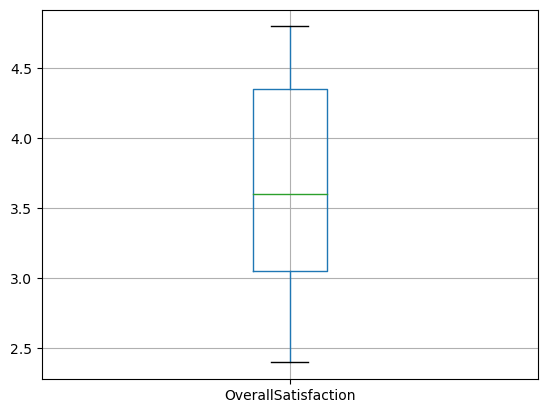

In [12]:
#Calculate overall satisfaction
df['OverallSatisfaction']=df[[' StaffSatisfaction', ' CleanlinessSatisfaction', ' FoodSatisfaction', ' ComfortSatisfaction', ' CommunicationSatisfaction']].mean(axis=1)

boxplot = df.boxplot(['OverallSatisfaction'], showfliers=True)

In [59]:
# Logistic regression
X = df['OverallSatisfaction'].values.reshape(-1,1)
Y = df[' Readmission']

log_reg = LogisticRegression().fit(X,Y)

In [60]:
# Correlation results
correlation_coefficient = log_reg.coef_[0][0]

if correlation_coefficient > 0:
    print("Logistic regression results indicated a: ")
    if correlation_coefficient > 0.5:
        print("Moderate correlation")
    elif correlation_coefficient > 0.7:
        print("Strong correlation")
    else:
        print("Weak correlation")
else:
    print("Logistic regression results indicated: ")
    print("No correlation")
    
print(f"The correlation efficient was {correlation_coefficient} ")

Logistic regression results indicated a: 
Weak correlation
The correlation efficient was 0.3362278182798735 


In [73]:
#plot the data
plt.pyplot.scatter(X,Y)
plt.pyplot.xlabel('Overall Satisfaction scores')
plt.pyplot.title('Logistic Regression - Overall Satisfaction vs Readmission')
plt.pyplot.plot(X, log_reg.predict(X), color = 'blue')